# Help NGO Clustering Assignment

#### Problem Statement:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, NGO have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.

#### Goal: 
- Cluster the countries based on economic condition and significant factors provided in dataset.
- List down the top 5 countries that are in the direst need of aid.


# Step 1: Import the required Libraries

In [1]:
# Import the required  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Scale
from sklearn.preprocessing import StandardScaler

# KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Handle the Warning
import warnings
warnings.filterwarnings("ignore")

# Step 2: Data Preparation

## 2.1 Data Loading

In [2]:
# Read the dataset
countries_data=pd.read_csv('Country-data.csv')
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## 2.2 Data Inspection

In [3]:
# Print the shape of dataset
countries_data.shape

(167, 10)

In [4]:
# Print the information regarding dataset
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Describe numerical columns in the dataset
countries_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Step 3: Data Cleaning

In [6]:
# Validate the null counts
countries_data.isnull().sum().sort_values()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Step 4: Data Stadadization

In [7]:
# Convert exports, imports and health columns values from percentages to absolute values
countries_data['exports'] = countries_data['exports'] * countries_data['gdpp']/100
countries_data['imports'] = countries_data['imports'] * countries_data['gdpp']/100
countries_data['health'] = countries_data['health'] * countries_data['gdpp']/100

# Step 5: Outlier Treatment

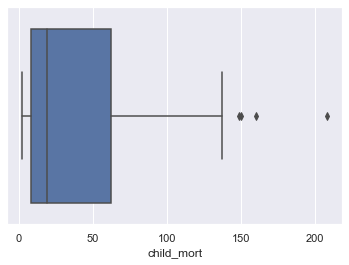

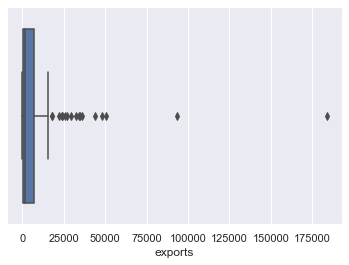

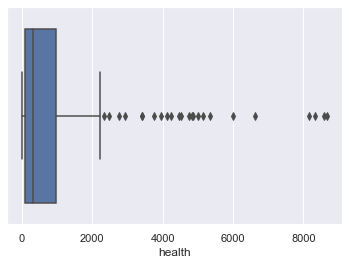

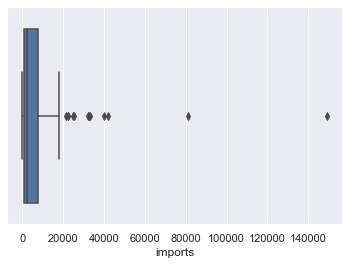

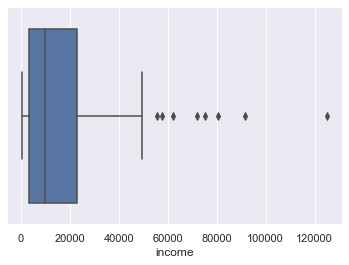

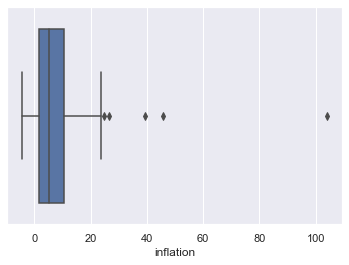

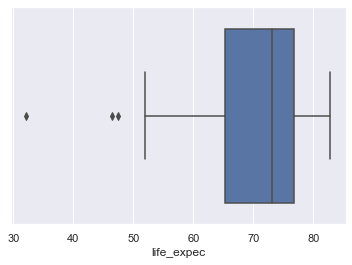

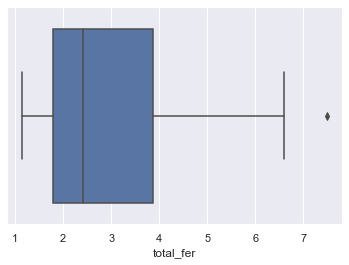

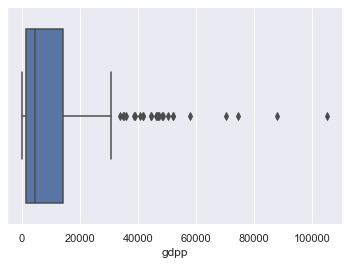

In [8]:
# Find the outiers in data
for column in list(countries_data.columns[1:]):
    sns.boxplot(countries_data[column])
    plt.show()

In [9]:
# Fix the outlier for 'exports','health', 'imports' ,'income' and 'gdpp' by the capping technique
cols =  ['exports','health', 'imports', 'income', 'gdpp']
for col in cols:
    upper_capping_value = countries_data[col].quantile(0.99)
    countries_data[col][countries_data[col] > upper_capping_value] = upper_capping_value   

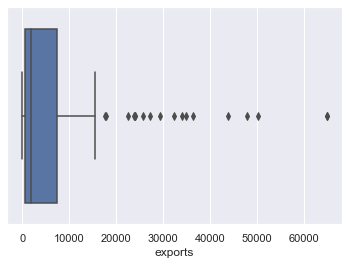

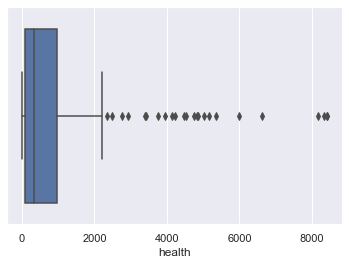

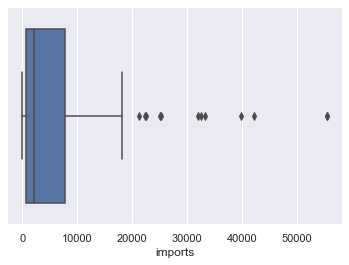

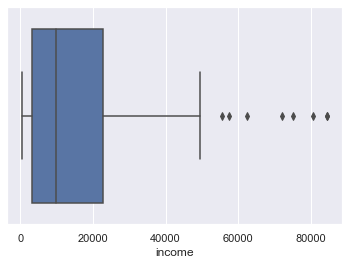

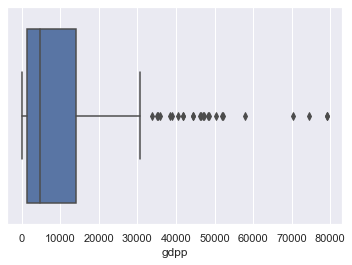

In [10]:
# Display the boxplot after fixing the oulier
for column in cols:
    sns.boxplot(countries_data[column])
    plt.show()

# Step 6: Data Visualization

## 6.1: Univariate and Bivariate Analysis

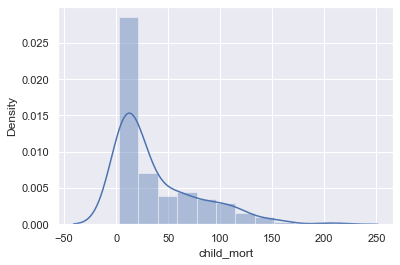

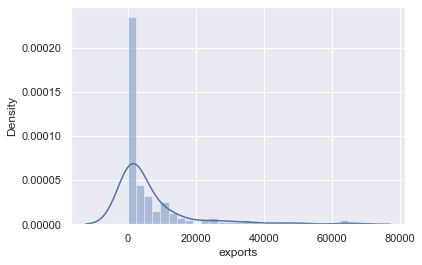

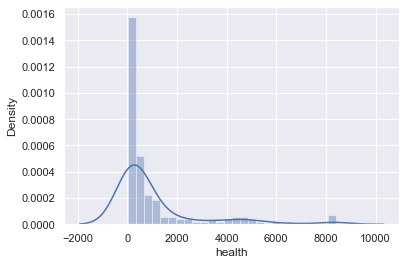

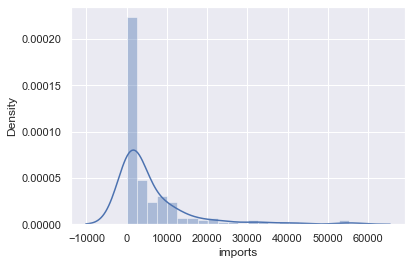

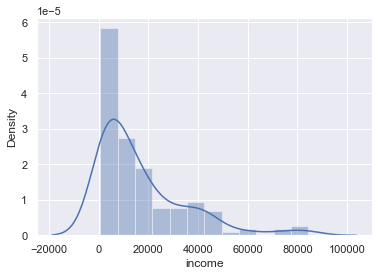

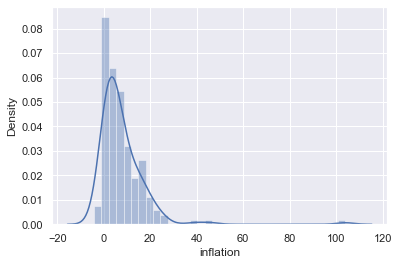

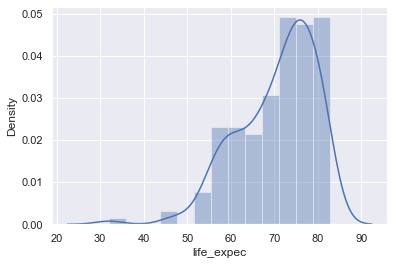

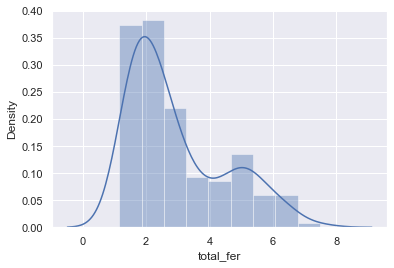

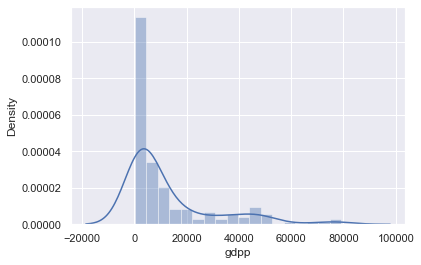

In [11]:
# Validate the distrbution of the each fields
for col in list(countries_data.columns[1:]):
    sns.distplot(countries_data[col])
    plt.show()

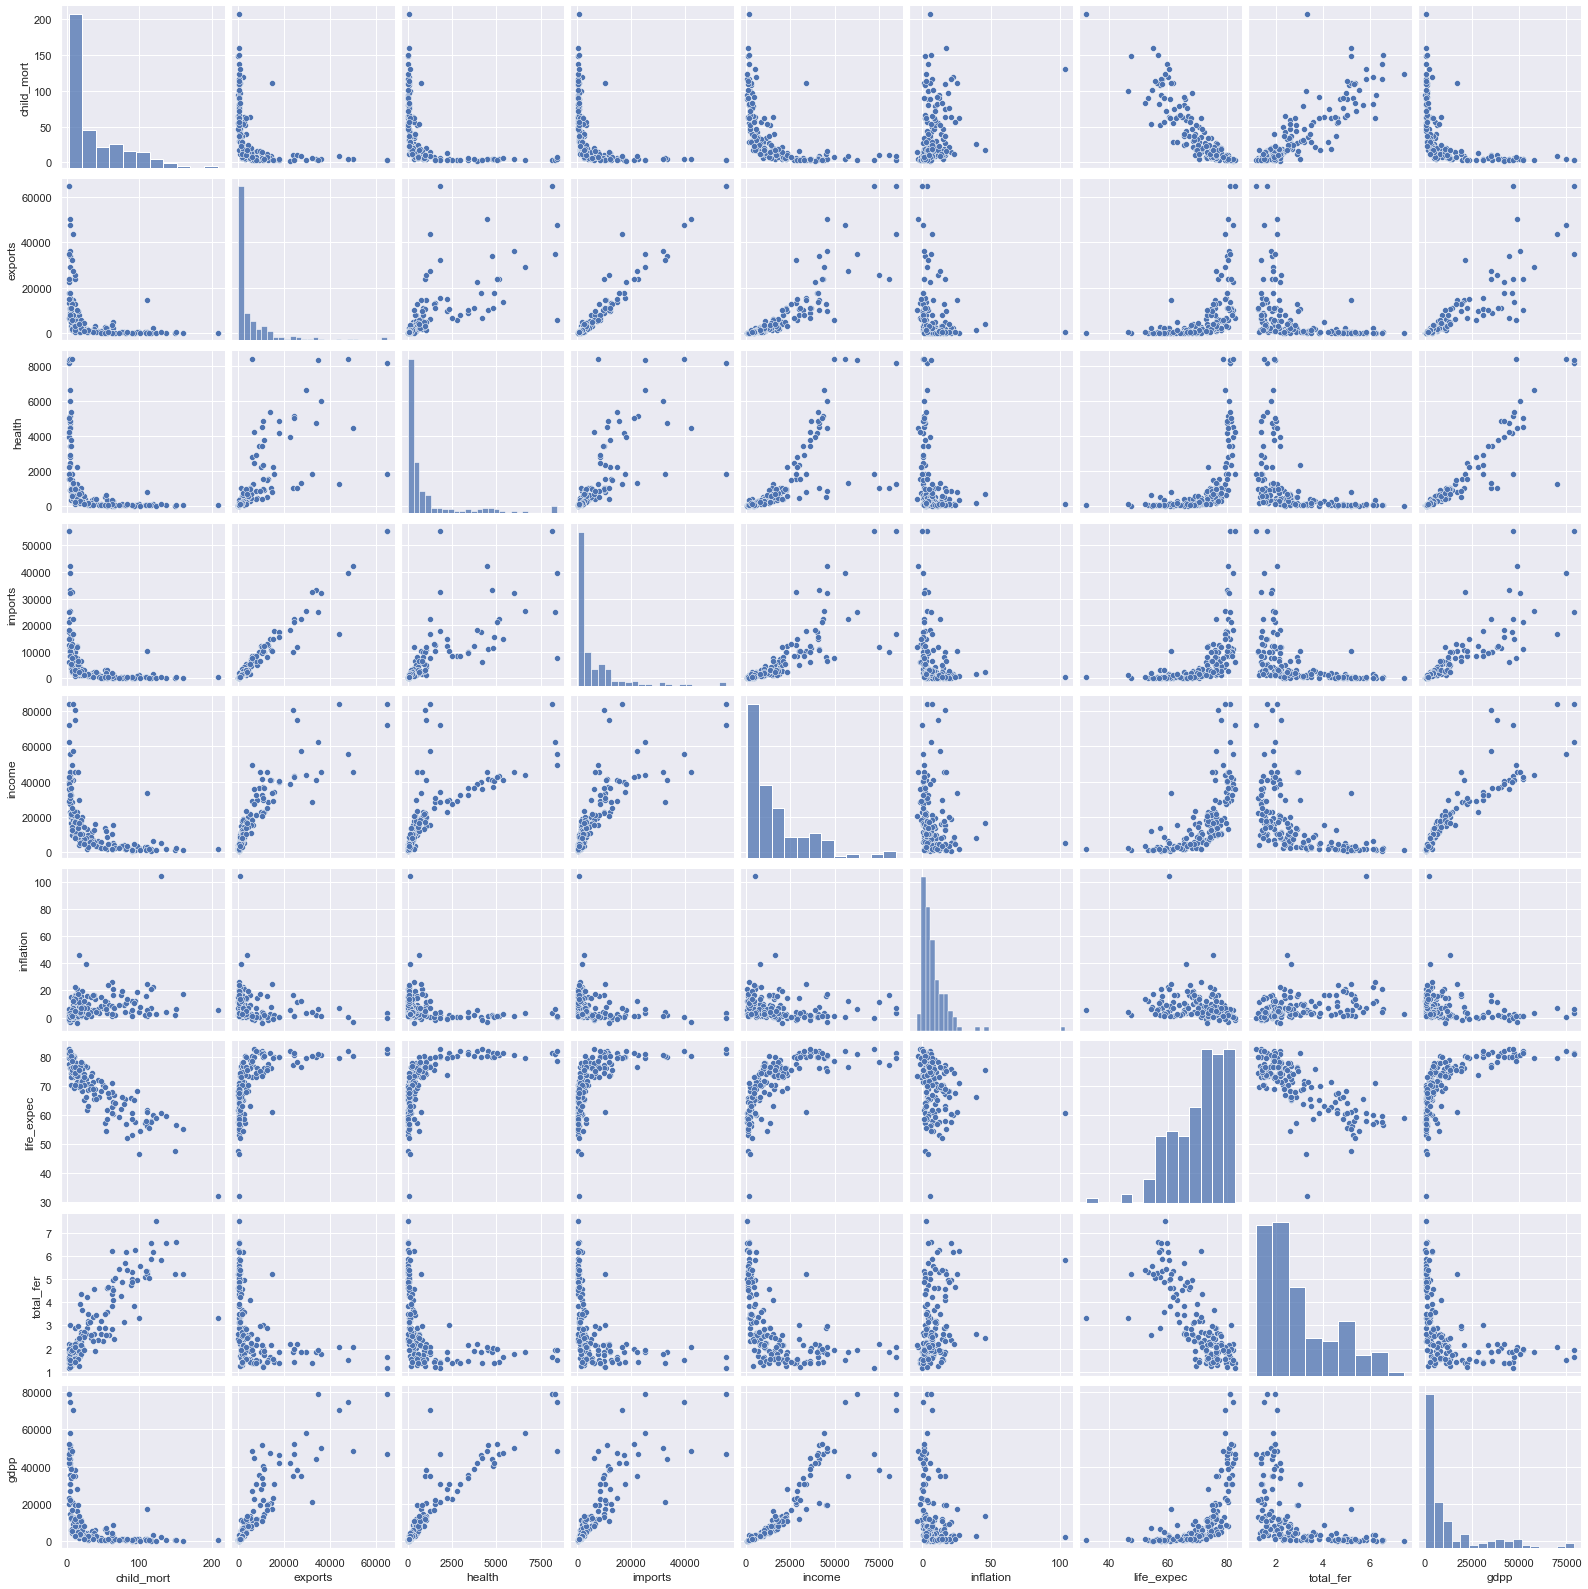

In [12]:
# Bivariate Analysis
sns.pairplot(countries_data.iloc[1:,:])
plt.show()

## 6.2: Validate correlation between variables 

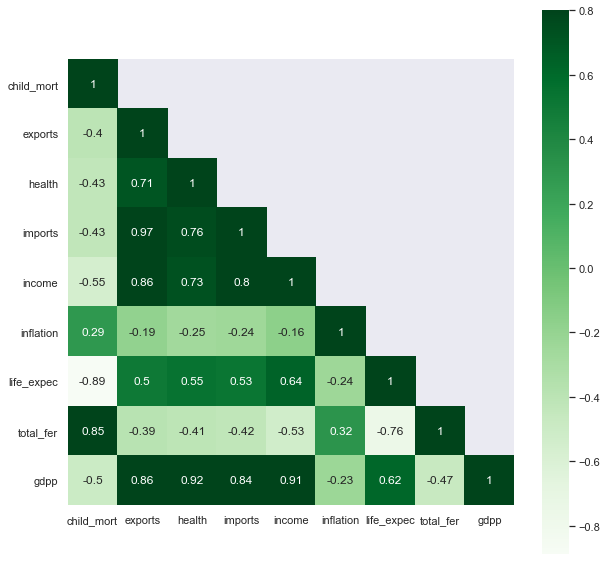

In [13]:
# Visuallize the correlation
# Find the correlation matrix
corr=countries_data[list(countries_data.columns[1:])].corr()

# Display the correlation
mask = np.array(corr)
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr, mask=mask, vmax=0.8, square=True, annot=True,cmap='Greens');

In [14]:
# Drop the 'imports' and 'health' columns due to Multicollinearity 
countries_data.drop(columns=['imports','health'],axis=1,inplace=True)

`Insight: ` From above plot, we can see that most of the variable pairs are highly colinear but we can not drop the major variable of model building so based on the significance drop 'imports','health' columns 

# Step 7: Scale the Data

In [15]:
# Scale all the columns with Standard scaler
ss = StandardScaler()
countries_scaled_data = ss.fit_transform(countries_data.drop("country",axis=1))

# Convvert the scaled  data to dataframe
countries_scaled_data = pd.DataFrame(countries_scaled_data)
countries_scaled_data.columns = countries_data.drop('country',axis=1).columns
countries_scaled_data.head()

,child_mort,exports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,0.125254,-0.601749,0.704258,-0.541946,-0.032042


# Step 8: Model Building


## 8.1: Hopkins Statistics

In [16]:
# Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [17]:
hopkins(countries_data.drop('country',axis=1))

0.9213628916232447

`Insight: `  This signifies that the data points differ 92% from uniformly distributed data in the multidimensional space.

## 8.2: Find the Optimal Value of k: 

- ### SSD

In [18]:
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(countries_scaled_data)
    ssd.append([k, kmean.inertia_])
ssd = pd.DataFrame(ssd)
ssd

,0,1
0,2,707.101755
1,3,437.528553
2,4,363.980590
3,5,284.820366
4,6,243.270726
5,7,217.985107
6,8,200.535050
7,9,178.403675
8,10,164.511817


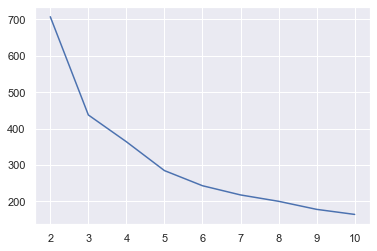

In [19]:
plt.plot(ssd[0], ssd[1]);

- ### Silhoutte Score

In [20]:
from sklearn.metrics import silhouette_score

sil_score = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(countries_scaled_data)
    sil_score.append([k, silhouette_score(countries_scaled_data, kmean.labels_)])
    
sil_df=pd.DataFrame(sil_score)
sil_df

,0,1
0,2,0.374577
1,3,0.425402
2,4,0.430573
3,5,0.394344
4,6,0.329329
5,7,0.329902
6,8,0.317197
7,9,0.270784
8,10,0.272436


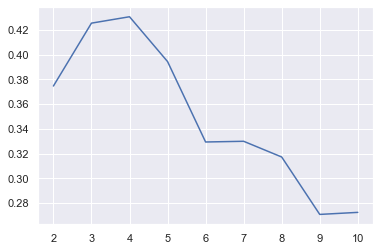

In [21]:
plt.plot(sil_df[0], sil_df[1]);

## 8.3: Build the Model using K-Means Algorithm at K=3

In [22]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(countries_scaled_data)

KMeans(n_clusters=3, random_state=0)

In [23]:
# Centroids
kmeans.cluster_centers_

array([[-0.43026121, -0.29659013, -0.21842722, -0.06262712,  0.30277331,
        -0.47782317, -0.3159454 ],
       [-0.8201429 ,  1.55221748,  1.6797068 , -0.41745106,  1.09124854,
        -0.73243094,  1.79530289],
       [ 1.32661038, -0.49724204, -0.72390519,  0.39181237, -1.27627565,
         1.3543418 , -0.62421756]])

In [24]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [25]:
# Now we will assign labels to our original dataframe
countries_data['labels'] = kmeans.labels_
countries_data.head()

,country,child_mort,exports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,19100.0,1.44,76.8,2.13,12200.0,0


In [26]:
# Validate the distribution of data point
countries_data.labels.value_counts()

0    87
2    48
1    32
Name: labels, dtype: int64

## 8.4: Analyze the Clusters

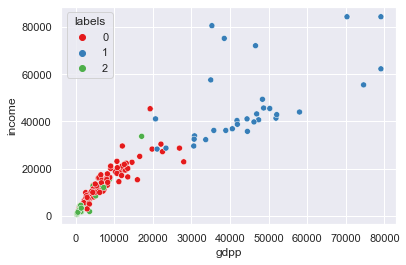

In [27]:
# Visualize the clusters based on 'gdpp' and 'income' variable
sns.scatterplot(x='gdpp', y='income', hue='labels', data=countries_data, palette='Set1');
plt.show()

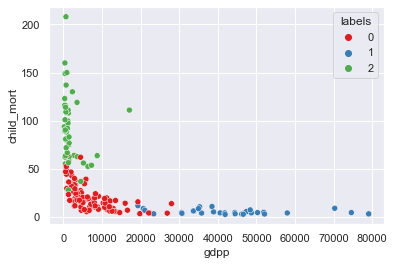

In [28]:
# Visualize the clusters based on 'gdpp' and 'child_mort' variable
sns.scatterplot(x='gdpp', y='child_mort', hue='labels', data=countries_data, palette='Set1');
plt.show()

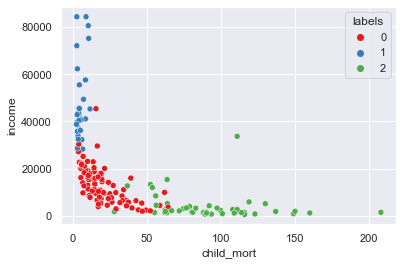

In [29]:
# Visualize the clusters based on 'child_mort' and 'income' variable
sns.scatterplot(x='child_mort', y='income', hue='labels', data=countries_data, palette='Set1');
plt.show()

##  8.5: Cluster Profiling:

In [30]:
# Prepare the dataframe for visualization
df = countries_data[['gdpp','income','child_mort','labels']].groupby(by='labels').mean().reset_index()
df

,labels,gdpp,income,child_mort
0,0,7266.344828,12947.011494,20.970115
1,1,43955.500000,46929.625000,5.293750
2,2,1909.208333,3897.354167,91.610417


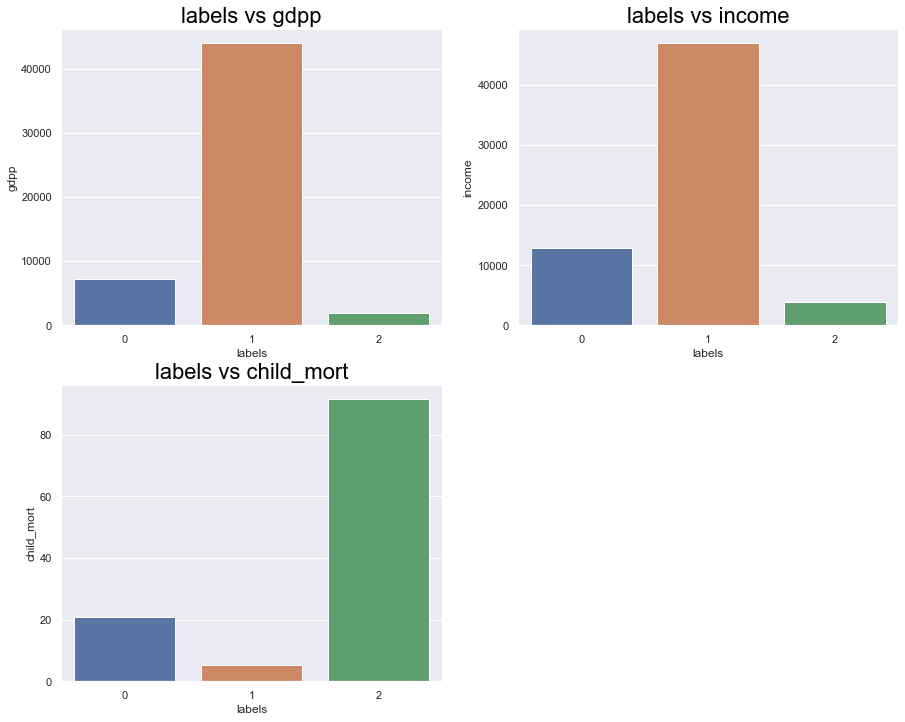

In [31]:
# Display the individual plot for each variable
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.barplot(x='labels',y='gdpp',data=df)
plt.title("labels vs gdpp",fontdict={'fontsize': 22, 'color': 'black'})

plt.subplot(222)
sns.barplot(x='labels',y='income',data=df)
plt.title("labels vs income",fontdict={'fontsize': 22, 'color': 'black'})

plt.subplot(223)
sns.barplot(x='labels',y='child_mort',data=df)
plt.title("labels vs child_mort",fontdict={'fontsize': 22, 'color': 'black'})

plt.show()

In [32]:
# List down the top five countries that are in the direst need of aid
countries_data[countries_data['labels']==2].sort_values(by=['gdpp','income', 'child_mort'], ascending=[True, True, False]).head()

,country,child_mort,exports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,20.6052,764.0,12.30,57.7,6.26,231.0,2
88,Liberia,89.3,62.4570,700.0,5.47,60.8,5.02,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,609.0,20.80,57.5,6.54,334.0,2
112,Niger,123.0,77.2560,814.0,2.55,58.8,7.49,348.0,2
132,Sierra Leone,160.0,67.0320,1220.0,17.20,55.0,5.20,399.0,2


# Hierarchical Clustering

In [33]:
# Print the scaled data
countries_scaled_data.head()

,child_mort,exports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,0.125254,-0.601749,0.704258,-0.541946,-0.032042


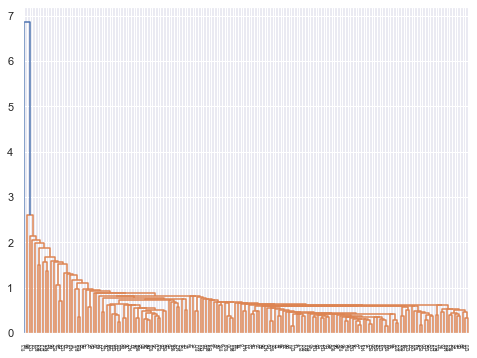

In [34]:
# single linkage
plt.figure(figsize=(8,6))
mergings = linkage(countries_scaled_data, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

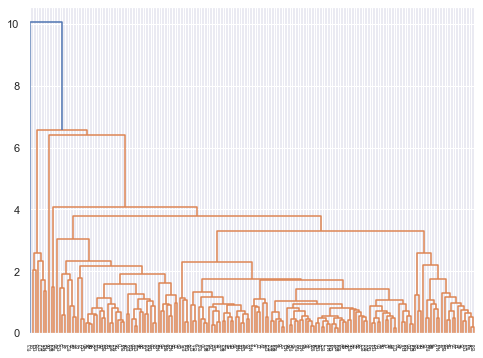

In [35]:
# average linkage
plt.figure(figsize=(8,6))
mergings = linkage(countries_scaled_data, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

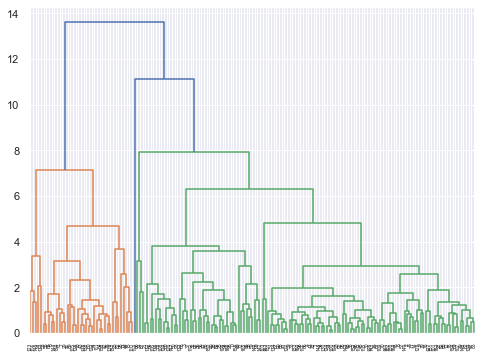

In [36]:
# complete linkage
plt.figure(figsize=(8,6))
mergings = linkage(countries_scaled_data, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

# Cut the Complete Linkage Dendrogram to obtain 3 Clusters

In [37]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [38]:
# assign cluster labels
countries_data['cluster_labels'] = cluster_labels
countries_data.head()

,country,child_mort,exports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
0,Afghanistan,90.2,55.30,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,19100.0,1.44,76.8,2.13,12200.0,0,0


### Cluster Profiling:

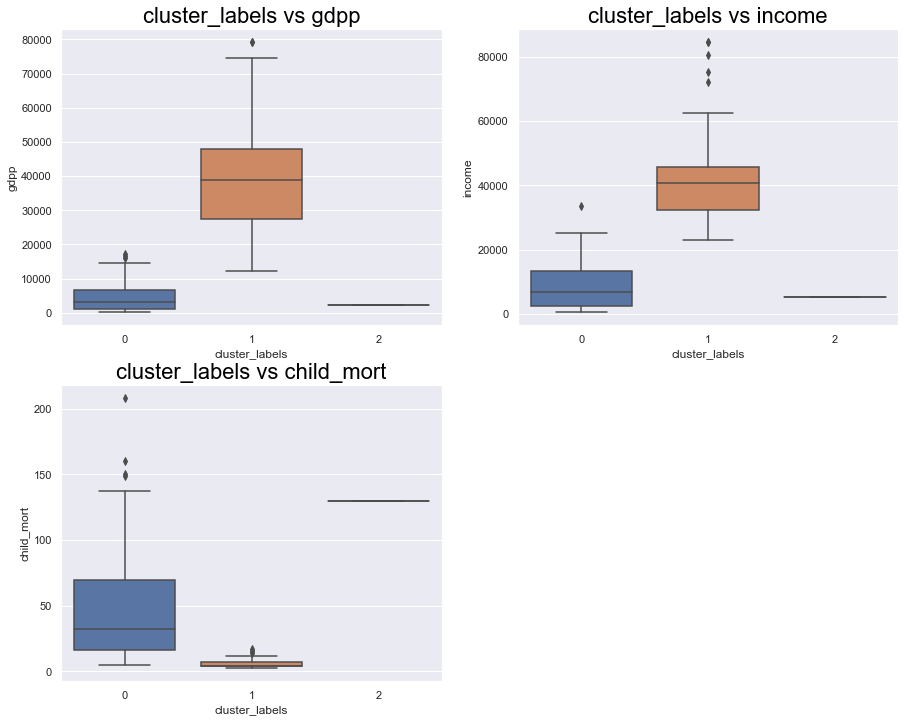

In [39]:
# Display the individual plot for each variable
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.boxplot(x='cluster_labels', y='gdpp', data=countries_data)
plt.title("cluster_labels vs gdpp",fontdict={'fontsize': 22, 'color': 'black'})

plt.subplot(222)
sns.boxplot(x='cluster_labels', y='income', data=countries_data)
plt.title("cluster_labels vs income",fontdict={'fontsize': 22, 'color': 'black'})

plt.subplot(223)
sns.boxplot(x='cluster_labels', y='child_mort', data=countries_data)
plt.title("cluster_labels vs child_mort",fontdict={'fontsize': 22, 'color': 'black'})

plt.show()

In [40]:
# List down the top five countries that are in the direst need of aid
countries_data[countries_data['cluster_labels']==2].sort_values(by=['gdpp','income', 'child_mort'], ascending=[True, True, False]).head()

,country,child_mort,exports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
113,Nigeria,130.0,589.49,5150.0,104.0,60.5,5.84,2330.0,2,2


`Note: ` As we got one country in poorest countries cluster so cutting dendrogram again

# Cut the Complete Linkage Dendrogram to obtain 2 Clusters

In [41]:
# 2 clusters
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# assign cluster labels
countries_data['cluster_labels'] = cluster_labels
countries_data.head()

,country,child_mort,exports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
0,Afghanistan,90.2,55.30,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,19100.0,1.44,76.8,2.13,12200.0,0,0


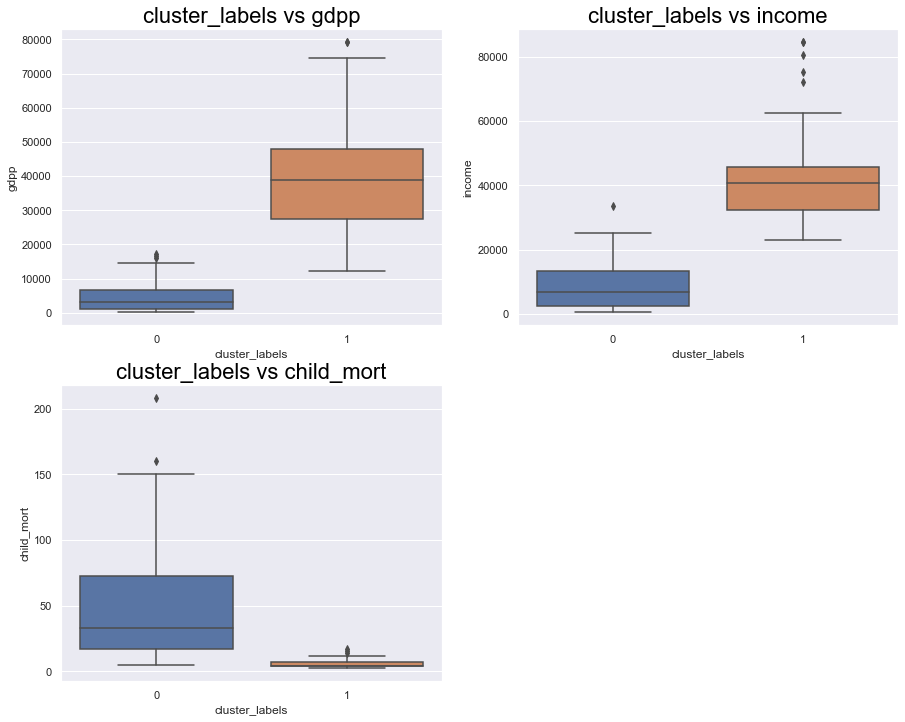

In [43]:
# Display the individual plot for each variable
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.boxplot(x='cluster_labels', y='gdpp', data=countries_data)
plt.title("cluster_labels vs gdpp",fontdict={'fontsize': 22, 'color': 'black'})

plt.subplot(222)
sns.boxplot(x='cluster_labels', y='income', data=countries_data)
plt.title("cluster_labels vs income",fontdict={'fontsize': 22, 'color': 'black'})

plt.subplot(223)
sns.boxplot(x='cluster_labels', y='child_mort', data=countries_data)
plt.title("cluster_labels vs child_mort",fontdict={'fontsize': 22, 'color': 'black'})

plt.show()

In [44]:
# List down the top five countries that are in the direst need of aid
countries_data[countries_data['cluster_labels']==0].sort_values(by=['gdpp','income', 'child_mort'], ascending=[True, True, False]).head()

,country,child_mort,exports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
26,Burundi,93.6,20.6052,764.0,12.30,57.7,6.26,231.0,2,0
88,Liberia,89.3,62.4570,700.0,5.47,60.8,5.02,327.0,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,609.0,20.80,57.5,6.54,334.0,2,0
112,Niger,123.0,77.2560,814.0,2.55,58.8,7.49,348.0,2,0
132,Sierra Leone,160.0,67.0320,1220.0,17.20,55.0,5.20,399.0,2,0


`Note: ` Compared the K-means and Hierarchical clustering results at K=3 and both are giving the different results. 
But if we comapred the top 5 countries which are in direst need of aid at K=3 in K-means and with 2 clusters in Hierarchical clustering then the countries are matching.

### The top-5 countries that are in need of aid from HELP are :

- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone